# Atmosphere-Graphing First Person Singular Pronouns

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [123]:
import pandas as pd
pd.set_option("max_rows", 200)
pd.set_option("max_columns", 200)
pd.options.display.float_format = lambda value : '{:.0f}'.format(value) if round(value,0) == value else '{:,.3f}'.format(value)

In [124]:
from pathlib import Path  
import glob

In [125]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import numpy as np

In [126]:
directory_path = "../Atmosphere/"

In [127]:
text_files = glob.glob(f"{directory_path}/*.txt")

In [128]:
album_titles = [Path(text).stem for text in text_files]

In [135]:
#STOPS = open('../stop-words.txt', encoding="utf-8").read().split('\n')

In [184]:
#Initialize CountVectorizer with desired parameters
count_vectorizer= CountVectorizer(input='filename', stop_words= None, token_pattern=r'\S+')

#Plug in "text_files," which contains all the albums, to the initialized count_vectorizer
word_count_vector = count_vectorizer.fit_transform(text_files)

In [185]:
#Make a DataFrame out of the word count vector and sort by title
word_count_df = pd.DataFrame(word_count_vector.toarray(), index=album_titles, columns=count_vectorizer.get_feature_names())
word_count_df = word_count_df.sort_index()

In [186]:
#adding in the years manually into a correctly ordered list
year = [2016, 2016, 2002, 1999, 2001, 2018, 1997, 2007, 2003, 2014, 2011, 2010, 2008, 2019, 2005]
word_count_df['year'] = year

In [187]:
#Add column for number of times each word appears in all the documents
word_count_df.loc['Document Frequency'] = (word_count_df > 0).sum()

In [188]:
word_count_df.sample(10, axis='columns')

,drummer,людьми,jug,"of,",mic's,temps,"flow,",escapist,greatest,"whore,"
Fishing-Blues,0,0,1,0,0,0,0,0,0,0
Frida-Kahlo-vs-Ezra-Pound,0,0,0,0,0,0,0,0,0,0
God-Loves-Ugly,0,0,0,2,0,0,0,0,0,0
Headshots-Se7en,0,0,0,0,1,0,1,0,0,0
Lucy-Ford-The-Atmosphere-EP-s,0,0,0,1,0,0,0,1,0,0
Mi-Vida-Local,0,0,0,0,0,0,0,0,0,0
Overcast,0,0,0,0,1,0,0,0,0,0
Sad-Clown-Bad-Year,0,0,0,0,0,0,0,0,0,0
Seven-s-Travels,0,0,0,0,0,0,0,0,0,1
Southsiders,0,0,0,0,0,0,1,0,0,0


# "I" frequency 

removed first person pronouns from the stopwords list to search for them

In [191]:
first_list = ['me', 'myself', 'my', 'mine', 'i']

In [192]:
first_df = word_count_df.sort_values(by = 'year')[first_list]
first_df

,me,myself,my,mine,i
Document Frequency,15,14,15,13,15
Overcast,106,1,192,1,358
Headshots-Se7en,225,2,220,0,439
Lucy-Ford-The-Atmosphere-EP-s,69,6,173,1,311
God-Loves-Ugly,109,1,131,1,317
Seven-s-Travels,93,5,126,1,230
You-Can-t-Imagine-How-Much-Fun-We-re-Having,69,2,57,4,174
Sad-Clown-Bad-Year,59,0,66,1,158
When-Life-Gives-You-Lemons-You-Paint-That-Shit-Gold,48,1,49,1,124
To-All-My-Friends-Blood-Makes-the-Blade-Holy-The-Atmosphere-Eps,24,2,39,2,161


In [194]:
newfirst_df = first_df.drop('Document Frequency', errors='ignore')
newfirst_df

,me,myself,my,mine,i
Overcast,106,1,192,1,358
Headshots-Se7en,225,2,220,0,439
Lucy-Ford-The-Atmosphere-EP-s,69,6,173,1,311
God-Loves-Ugly,109,1,131,1,317
Seven-s-Travels,93,5,126,1,230
You-Can-t-Imagine-How-Much-Fun-We-re-Having,69,2,57,4,174
Sad-Clown-Bad-Year,59,0,66,1,158
When-Life-Gives-You-Lemons-You-Paint-That-Shit-Gold,48,1,49,1,124
To-All-My-Friends-Blood-Makes-the-Blade-Holy-The-Atmosphere-Eps,24,2,39,2,161
The-Family-Sign,71,1,95,2,193


In [196]:
newfirst_df['Total'] = newfirst_df.sum(axis=1)

In [198]:
newfirst_df

,me,myself,my,mine,i,Total
Overcast,106,1,192,1,358,658
Headshots-Se7en,225,2,220,0,439,886
Lucy-Ford-The-Atmosphere-EP-s,69,6,173,1,311,560
God-Loves-Ugly,109,1,131,1,317,559
Seven-s-Travels,93,5,126,1,230,455
You-Can-t-Imagine-How-Much-Fun-We-re-Having,69,2,57,4,174,306
Sad-Clown-Bad-Year,59,0,66,1,158,284
When-Life-Gives-You-Lemons-You-Paint-That-Shit-Gold,48,1,49,1,124,223
To-All-My-Friends-Blood-Makes-the-Blade-Holy-The-Atmosphere-Eps,24,2,39,2,161,228
The-Family-Sign,71,1,95,2,193,362


# Graph 
**first person pronouns**

In [199]:
values = newfirst_df[['Total']]

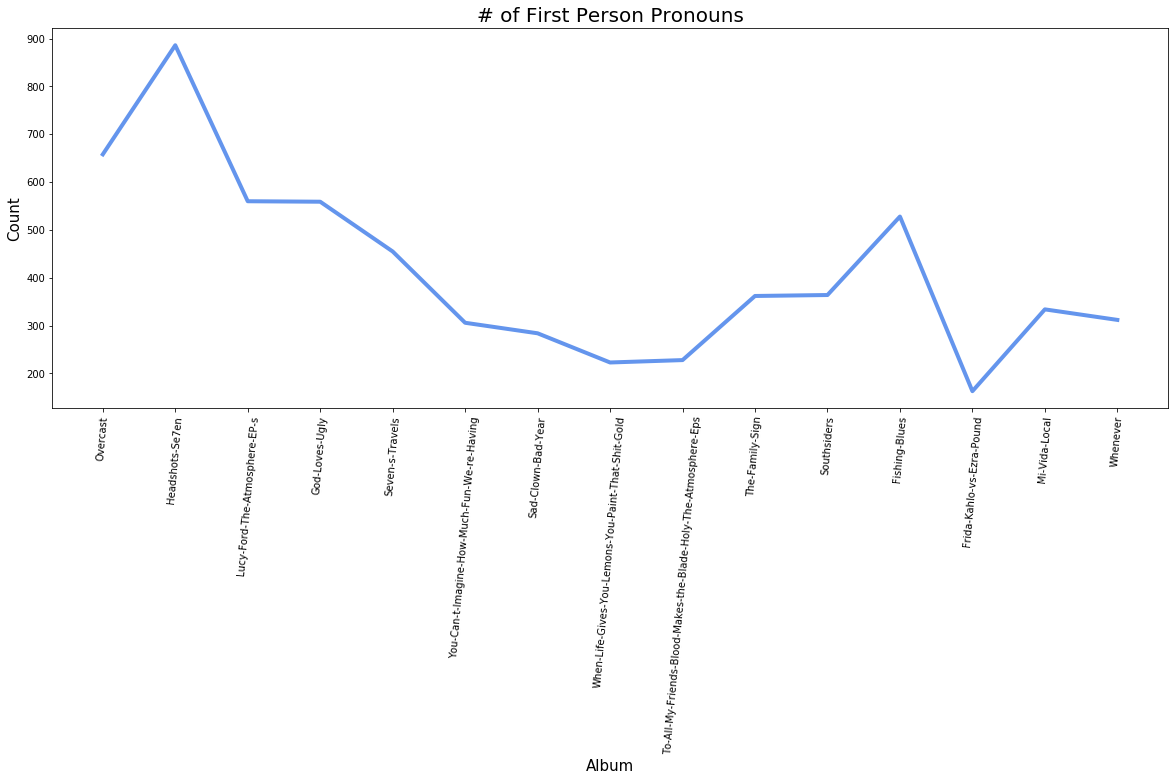

<Figure size 432x288 with 0 Axes>

In [202]:
plt.figure(figsize=(20, 7))

plt.plot(newfirst_df.index, values, color='cornflowerblue', linewidth = 4.0)
plt.xlabel('Album', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('# of First Person Pronouns', fontsize = 20)
plt.xticks(rotation=85)
plt.show()
plt.savefig('first_person.png', bbox_inches='tight')